In [ ]:
# Thera Bank Personal Loan Campaign
# The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [45]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline


In [46]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [48]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [49]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Number of unique in each column

In [50]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
#Number of people with zero mortgage

In [51]:
#print (df['Mortgage'] == 0).sum()
print ((df['Mortgage'] == 0).values.sum())


3462


In [52]:
#Number of people with zero credit card spending per month
print ((df['CCAvg'] == 0).values.sum())

106


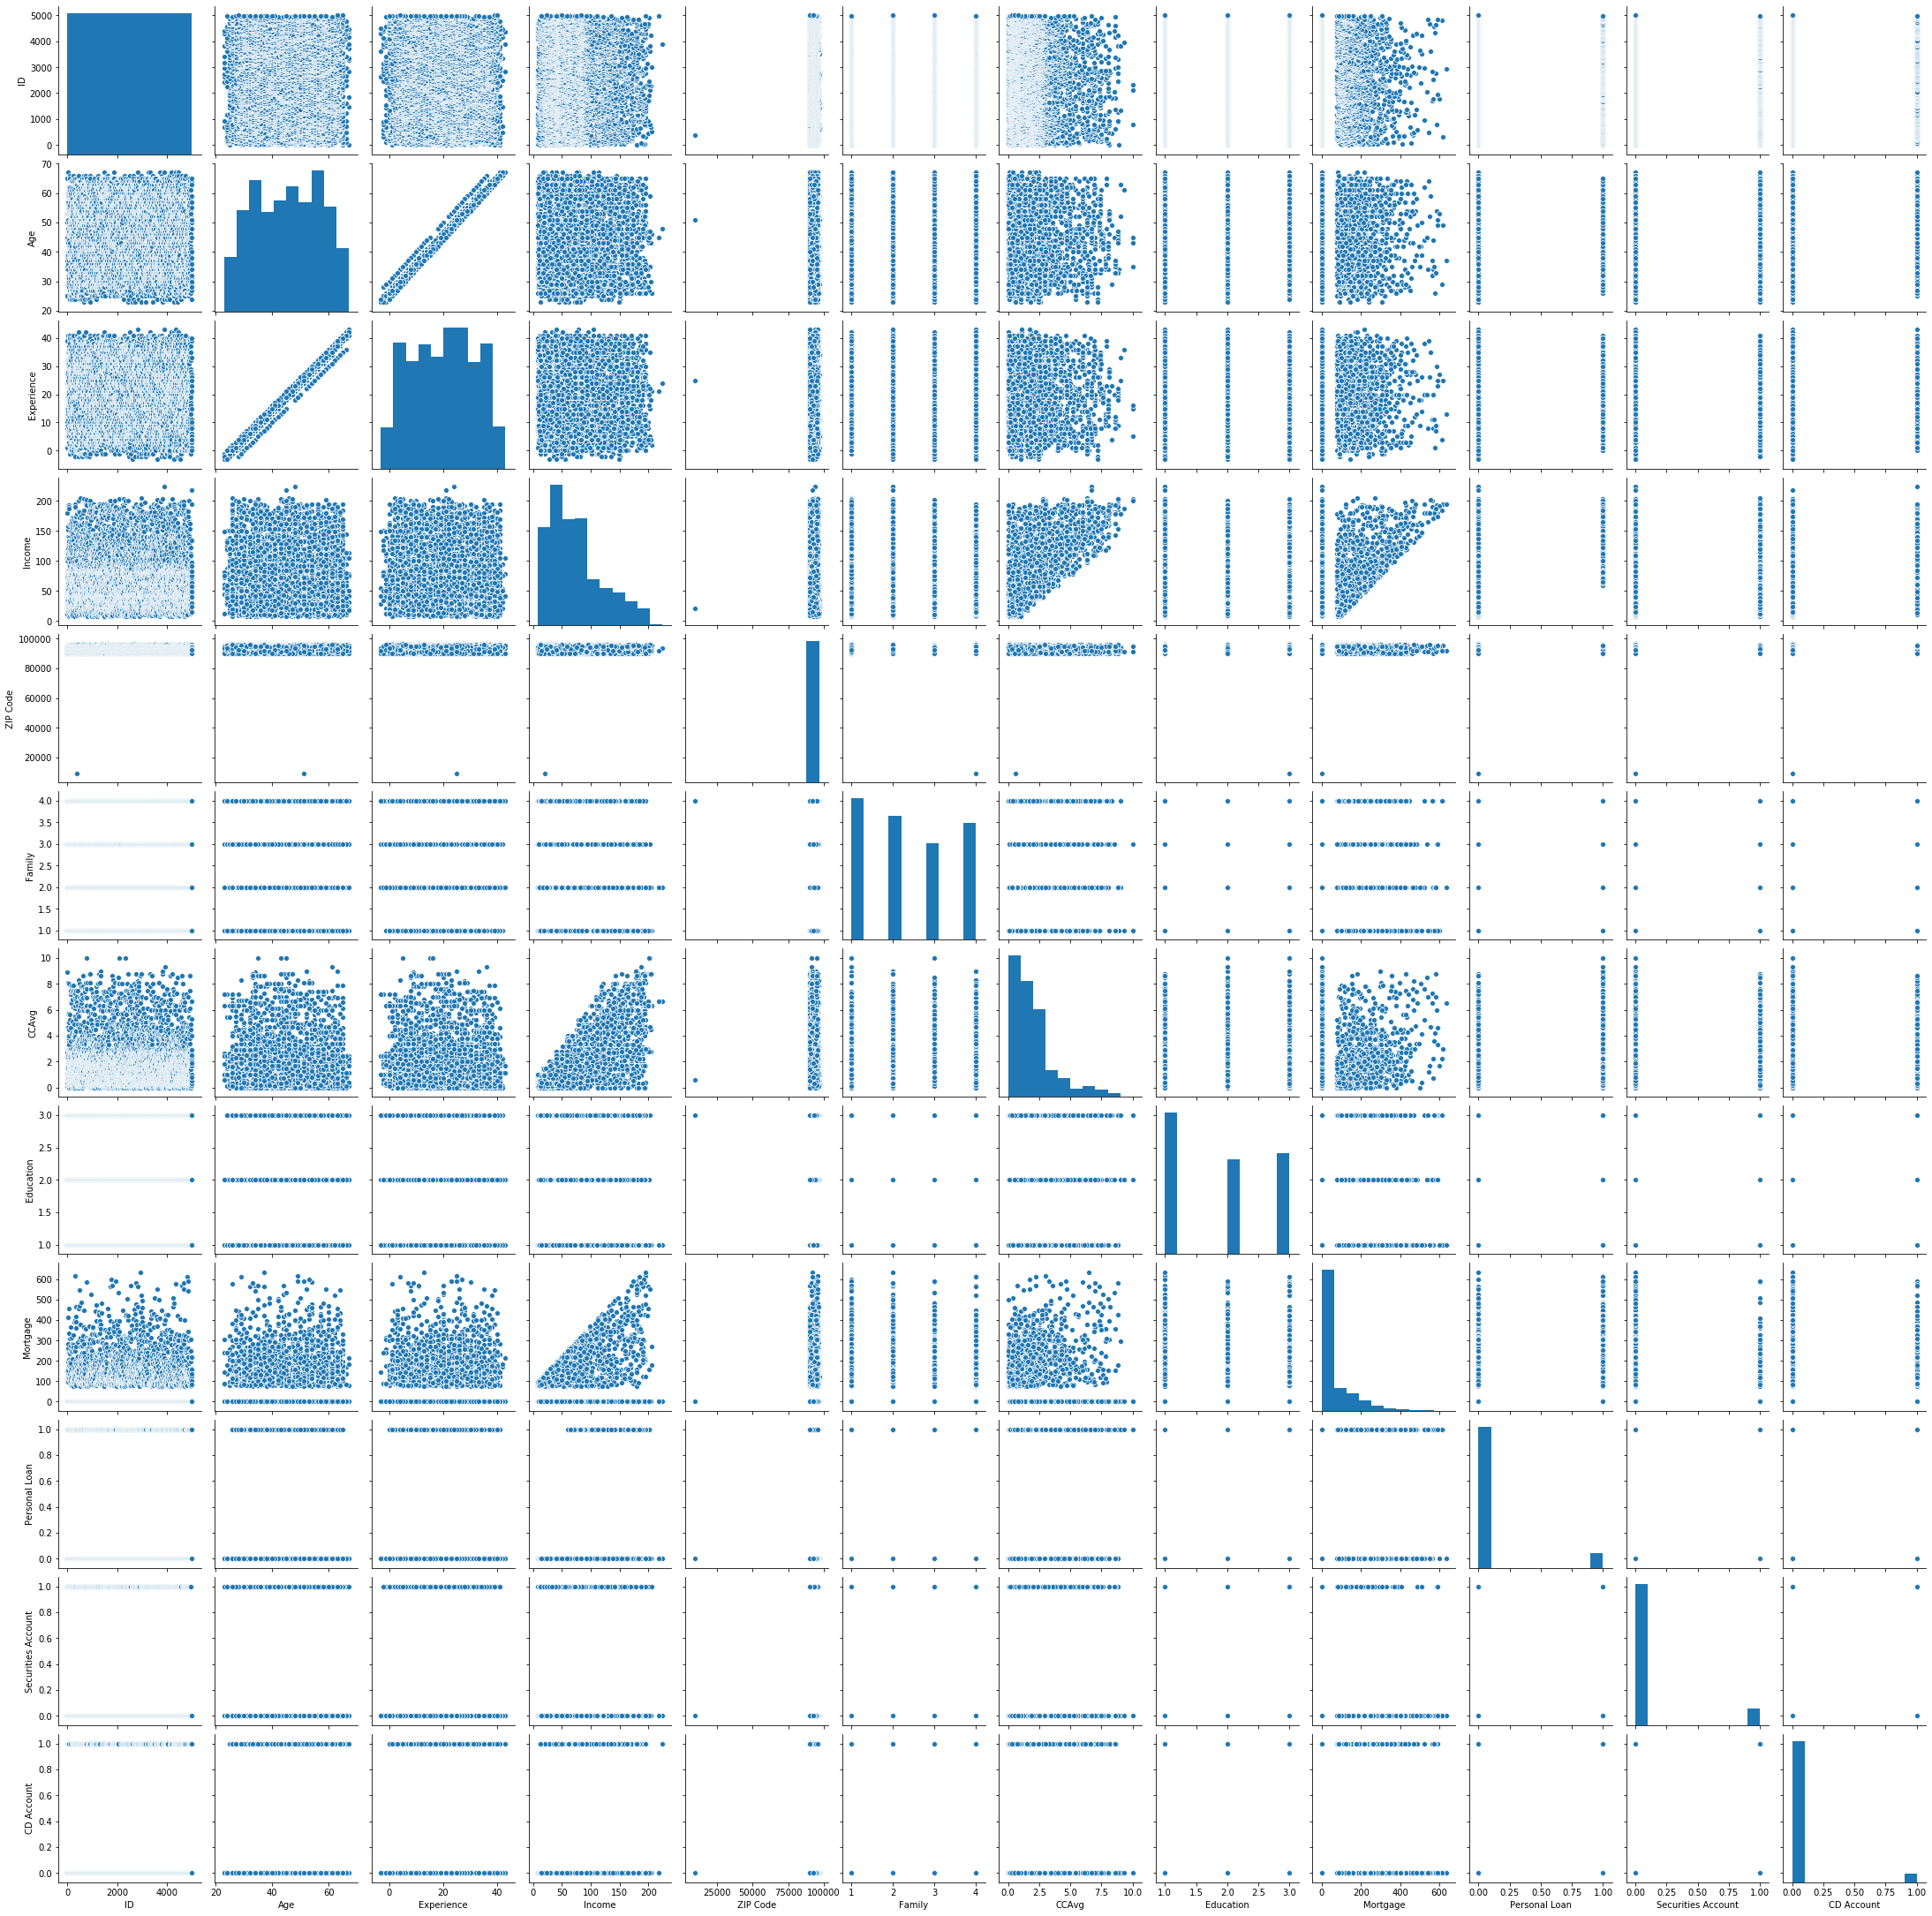

In [54]:
#importing seaborn for statistical plots
#Univariate and Bivariate
import seaborn as sns
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [24]:
#Value counts of all categorical columns
#Categorical columns - Personal Loan, Securities Acciunt,CD Account, Online,Credit Card.

In [60]:
print ((df['Personal Loan']).values.sum())

480


In [62]:
print ((df['Securities Account']).values.sum())

522


In [63]:
print ((df['CD Account']).values.sum())

302


In [64]:
print ((df['Online']).values.sum())

2984


In [66]:
print ((df['CreditCard']).values.sum())

1470


In [55]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']

In [56]:
features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [57]:
#Split the data into training and test set in the ratio of 70:30 respectively
features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.30 # taking 70:30 training and test setseed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [58]:
#Use Logistic Regression model to predict whether the customer will take personal loan or
#not. 
#Print all the metrics related for evaluating the model performance 
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.916
[[1333   29]
 [  97   41]]


In [59]:
#Give your reasoning on how can the model perform better?

# The accuracy score  looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.59      0.30      0.39       138

    accuracy                           0.92      1500
   macro avg       0.76      0.64      0.67      1500
weighted avg       0.90      0.92      0.90      1500



In [40]:
#Give Business understanding of your model
The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

SyntaxError: invalid syntax (<ipython-input-40-4ac075cf14c2>, line 2)